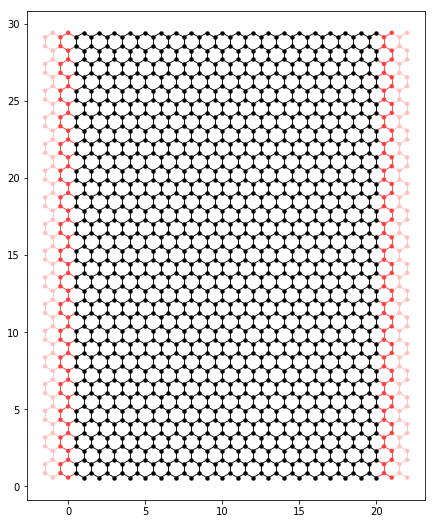

In [2]:
import kwant
import matplotlib.pyplot as plt

lat = kwant.lattice.honeycomb()
sys = kwant.Builder()

def rectangle(pos):
    x, y = pos
    return 0 < x < 20 and 0 < y < 30

sys[lat.shape(rectangle, (1, 1))] = 0
sys[lat.neighbors()] = -1

sym = kwant.TranslationalSymmetry((-1, 0))

# We specify a specific fundamental domain/unit cell for the
# translational symmetry: with other_vecs we add a second
# (linear independent) lattice vector that complements the
# translational vector above. Both vectors then form a basis.
#
# Note: - other_vecs must be lattice vectors, i.e. integer vectors.
#         Also, it only holds for the one (sub)lattice specified in
#         add_site_family.
#       - in contrast, kwant.TranslationalSymmetry takes a
#         real-space vector. This is because it could hold for different
#         lattices (which have different basis vectors). This real-space
#         vector is converted internally to a lattice vector for each
#         lattice.
sym.add_site_family(lat.sublattices[0], other_vectors=[(-1, 2)])
sym.add_site_family(lat.sublattices[1], other_vectors=[(-1, 2)])

lead = kwant.Builder(sym)

def lead_shape(pos):
    x, y = pos
    return 0 < y < 30

lead[lat.shape(lead_shape, (1,1))] = 0
lead[lat.neighbors()] = -1

sys.attach_lead(lead)
sys.attach_lead(lead.reversed())

kwant.plot(sys, fig_size=(16, 9));

In [3]:
lat.prim_vecs

array([[ 1.       ,  0.       ],
       [ 0.5      ,  0.8660254]])